In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_excel("../../data/bps-od_17106_jml_pengeluaran_per_kapita__kabupatenkota_data.xlsx", sheet_name="data")
data.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,pengeluaran_per_kapita,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,8951.96,RIBU RUPIAH,2010
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,7658.57,RIBU RUPIAH,2010
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,6430.92,RIBU RUPIAH,2010
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,8740.07,RIBU RUPIAH,2010
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,6149.57,RIBU RUPIAH,2010


In [3]:
data.shape

(294, 8)

In [9]:
data_2020 = data[data["tahun"] == 2020]
data_2020.reset_index(drop=True, inplace=True)
data_2020.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,pengeluaran_per_kapita,satuan,tahun
0,268,32,JAWA BARAT,3201,KABUPATEN BOGOR,10317.0,RIBU RUPIAH,2020
1,269,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,8823.0,RIBU RUPIAH,2020
2,270,32,JAWA BARAT,3203,KABUPATEN CIANJUR,7980.0,RIBU RUPIAH,2020
3,271,32,JAWA BARAT,3204,KABUPATEN BANDUNG,10201.0,RIBU RUPIAH,2020
4,272,32,JAWA BARAT,3205,KABUPATEN GARUT,7876.0,RIBU RUPIAH,2020


In [16]:
JUMLAH_CLUSTER = 3

kmeans = KMeans(n_clusters=JUMLAH_CLUSTER, random_state=69)
kmeans.fit(data_2020[["pengeluaran_per_kapita"]])
data_2020["cluster"] = kmeans.labels_

silhouette_score(data_2020[["pengeluaran_per_kapita"]], data_2020["cluster"], metric="euclidean")

C:\Users\Asus\AppData\Local\Temp\ipykernel_19188\1310344584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020["cluster"] = kmeans.labels_


0.6155671309066764

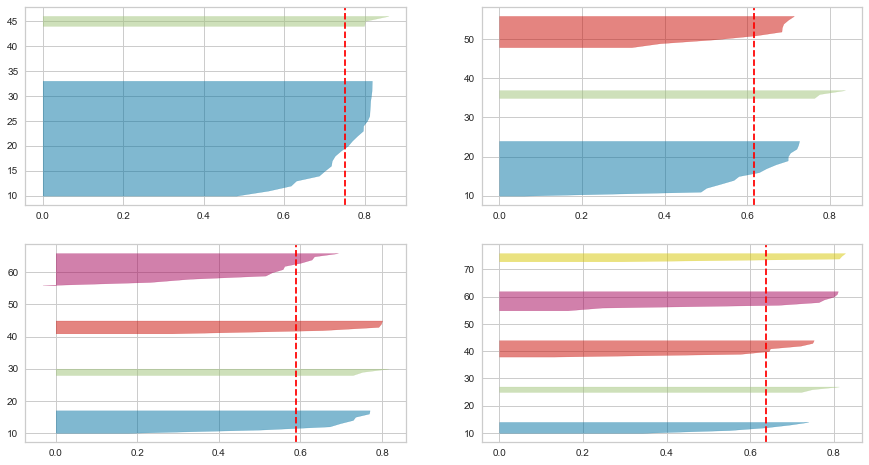

In [23]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_2020[["pengeluaran_per_kapita"]])